In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

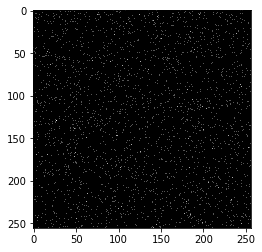

In [2]:
img_shape = (256,256)
img = np.zeros(img_shape, dtype=float)
noise = np.random.poisson(lam=0.05, size=img_shape)
img_noised = img+noise
plt.imshow(img_noised, cmap='gray')

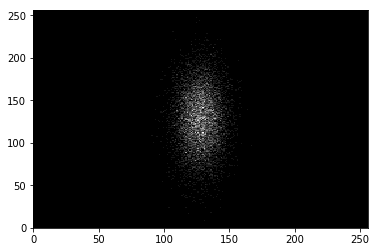

In [10]:
mean = [128, 128]
cov = [[100, 0], [0, 1000]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=[np.linspace(0,256,256),np.linspace(0,256,256)], cmap='gray')
plt.show()
#cb = plt.colorbar()
#cb.set_label('counts in bin')
#np.linspace

In [16]:
# Function to distort image
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
def elastic_transform(image, alpha, sigma, alpha_affine, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.

     Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    shape_size = shape[:2]
    
    # Random affine
    center_square = np.float32(shape_size) // 2
    square_size = min(shape_size) // 3
    pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

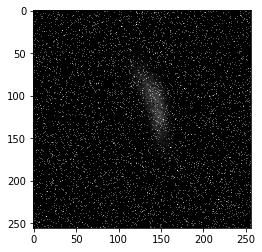

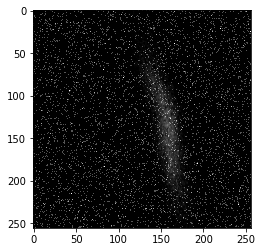

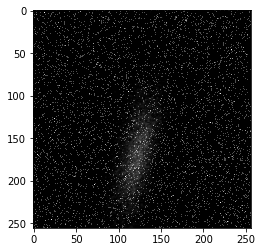

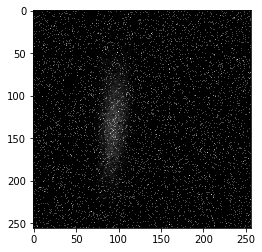

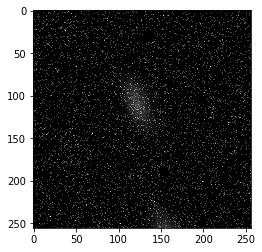

In [17]:
%matplotlib inline
plt.figure()
for i in range(5):
    img_shape = (256,256)
    img = np.zeros(img_shape, dtype=float)
    noise = np.random.poisson(lam=0.1, size=img_shape)
    img_noised = img
    mean = [128, 128]
    cov = [[1000, 0], [0, 100]]
    x, y = np.random.multivariate_normal(mean, cov, 10000).T
    hist = np.histogram2d(x, y, bins=[np.linspace(0,256,257),np.linspace(0,256,257)])
    img = hist[0]+img_noised*7

    # Load images
    im = img.copy()*10
    im_mask = im.copy()

    # Draw grid lines
    #draw_grid(im, 50)
    #draw_grid(im_mask, 50)

    # Merge images into separete channels (shape will be (cols, rols, 2))
    im_merge = np.concatenate((im[...,None], im_mask[...,None]), axis=2)

    # Apply transformation on image
    im_merge_t = elastic_transform(im_merge, im_merge.shape[1] * 2, im_merge.shape[1] * 0.08, im_merge.shape[1] * 0.20)

    # Split image and mask
    im_t = im_merge_t[...,0]
    im_mask_t = im_merge_t[...,1]
    # Display result
    im_t = im_t+noise*60
    #cv2.imwrite("/Users/gunel/Desktop/tmp/{:006d}.png".format(i),  im_t*255.0/im_t.max())
    #cv2.imwrite("/Users/gunel/Desktop/tmp/{:006d}.png".format(i),  im_t)
    plt.figure()
    plt.imshow(im_t,cmap='gray')
    #plt.figure()
    #plt.imshow(im_t*255.0/im_t.max(), cmap='gray')
    #plt.imshow(imt_t, cmap='gray')
    #plt.show()
    
    #plt.figure(figsize = (16,14))
    #plt.imshow(np.c_[np.r_[im, im_mask], np.r_[im_t, im_mask_t]], cmap='gray')

(256, 256)


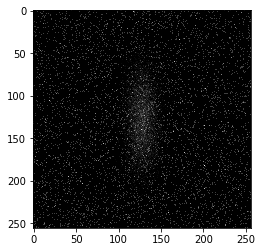

In [14]:
from skimage import color
img_shape = (256,256)
img = np.zeros(img_shape, dtype=float)
noise = np.random.poisson(lam=0.1, size=img_shape)
img_noised = img+noise
mean = [128, 128]
cov = [[1000, 0], [0, 100]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
hist = np.histogram2d(x, y, bins=[np.linspace(0,256,257),np.linspace(0,256,257)])
img = hist[0]+img_noised*7
#img = color.gray2rgb(img)
print(img.shape)
plt.imshow(img, cmap='gray')

#plt.figure()
#plt.imshow(elastic_transform(img, 10000, 1000))